# Computation of the CTA sensitivity

## Introduction

This notebook explains how to derive the CTA sensitivity for a point-like IRF at a fixed zenith angle and fixed offset. The significativity is computed for the 1D analysis (On-OFF regions) and the LiMa formula.

We will be using the following Gammapy classes:

* [gammapy.irf.CTAIrf](http://docs.gammapy.org/dev/api/gammapy.irf.CTAIrf.html)
* [gammapy.spectrum.SensitivityEstimator](http://docs.gammapy.org/dev/api/gammapy.spectrum.SensitivityEstimator.html)

## Setup
As usual, we'll start with some setup ...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from gammapy.irf import CTAPerf
from gammapy.spectrum import SensitivityEstimator

## Load IRFs

First load the CTA IRFs.

In [3]:
filename = "$GAMMAPY_EXTRA/datasets/cta/perf_prod2/point_like_non_smoothed/South_5h.fits.gz"
irf = CTAPerf.read(filename)

## Compute sensitivity

Choose a few parameters, then run the sentitivity computation.

In [4]:
sensitivity_estimator = SensitivityEstimator(irf=irf, livetime="5h")
sensitivity_estimator.run()

## Results

The results are given as an Astropy table.

In [5]:
# Show the results table
sensitivity_estimator.results_table

energy,e2dnde,excess,background,criterion
TeV,erg / (cm2 s),,,
float32,float64,float64,float32,str12
0.0158489,1.26569e-10,339.143,3703.48,significance
0.0251189,2.41235e-11,311.106,3106.66,significance
0.0398107,1.5914e-11,459.213,6852.06,significance
0.0630957,4.26714e-12,163.204,825.794,significance
0.1,3.04454e-12,169.361,891.645,significance
0.158489,1.55368e-12,90.0926,236.905,significance
0.251189,1.0771e-12,51.5349,69.8381,significance
0.398107,7.83236e-13,35.6905,29.8996,significance


In [6]:
# Save it to file (could use e.g. format of CSV or ECSV or FITS)
# sensitivity_estimator.results_table.write('sensitivity.ecsv', format='ascii.ecsv')

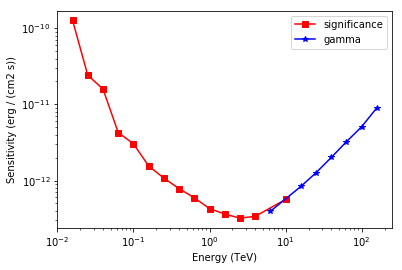

In [7]:
# Plot the sensitivity curve
t = sensitivity_estimator.results_table

is_s = t["criterion"] == "significance"
plt.plot(
    t["energy"][is_s],
    t["e2dnde"][is_s],
    "s-",
    color="red",
    label="significance",
)

is_g = t["criterion"] == "gamma"
plt.plot(
    t["energy"][is_g], t["e2dnde"][is_g], "*-", color="blue", label="gamma"
)

plt.loglog()
plt.xlabel("Energy ({})".format(t["energy"].unit))
plt.ylabel("Sensitivity ({})".format(t["e2dnde"].unit))
plt.legend();

## Exercises

* Also compute the sensitivity for a 20 hour observation
* Compare how the sensitivity differs between 5 and 20 hours by plotting the ratio as a function of energy.